# Exploratory Data Analysis (EDA) - Raw Data
## Sentiment Analysis System - BANA 4325 Final Project

**Dataset Information:**
- **Source**: Amazon Product Reviews Dataset
- **Original Source**: https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews
- **File**: `data/Reviews.csv`
- **Description**: This dataset contains product reviews and ratings from Amazon
- **Features**: Product reviews (text), star ratings (1-5), user information, timestamps, and product details
- **Size**: ~500,000+ reviews
- **Use Case**: Binary sentiment classification (Positive vs Negative)

**Purpose:** This notebook provides comprehensive exploratory data analysis of the **raw, unprocessed** Amazon Reviews dataset before any cleaning, preprocessing, or modeling.

**Note:** This EDA was added based on professor feedback to show proper understanding of the data before modeling.

**Analysis Date**: December 6, 2025  
**Course**: BANA 4325 - Data Mining  
**Student**: Victoria Alabi

## Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [2]:
# Load RAW data - no preprocessing or cleaning applied
df_raw = pd.read_csv('data/Reviews.csv', encoding='utf-8', on_bad_lines='skip')

print(f"Dataset loaded successfully!")
print(f"Total records: {len(df_raw):,}")
print(f"Total columns: {len(df_raw.columns)}")

Dataset loaded successfully!
Total records: 568,454
Total columns: 10


## 1. Dataset Overview and Structure

In [3]:
# Display first few rows
print("First 5 rows of raw data:")
df_raw.head()

First 5 rows of raw data:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Display dataset info
print("Dataset Information:")
df_raw.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
# Display column names and data types
print("\nColumn Names and Types:")
for col in df_raw.columns:
    print(f"  - {col}: {df_raw[col].dtype}")


Column Names and Types:
  - Id: int64
  - ProductId: object
  - UserId: object
  - ProfileName: object
  - HelpfulnessNumerator: int64
  - HelpfulnessDenominator: int64
  - Score: int64
  - Time: int64
  - Summary: object
  - Text: object


In [6]:
# Display basic statistics
print("\nNumerical Column Statistics:")
df_raw.describe()


Numerical Column Statistics:


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


## 3. Rating Distribution Analysis (RAW - Before Any Processing)

**Key Question:** What does the original rating distribution look like? Is there class imbalance?

In [7]:
# Identify the rating column (commonly 'Score' or 'Rating')
rating_column = 'Score' if 'Score' in df_raw.columns else \
                'Rating' if 'Rating' in df_raw.columns else \
                df_raw.columns[1]  # Fallback to second column

print(f"Using rating column: '{rating_column}'")

# Count raw ratings
rating_counts = df_raw[rating_column].value_counts().sort_index()
print(f"\nRaw Rating Distribution:")
print(rating_counts)
print(f"\nPercentage Distribution:")
print((rating_counts / len(df_raw) * 100).round(2))

Using rating column: 'Score'

Raw Rating Distribution:
Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64

Percentage Distribution:
Score
1     9.19
2     5.24
3     7.50
4    14.19
5    63.88
Name: count, dtype: float64


In [8]:
# Visualize raw rating distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
colors = ['#e74c3c', '#e74c3c', '#95a5a6', '#2ecc71', '#2ecc71']  # Red for 1-2, Gray for 3, Green for 4-5
bars = ax1.bar(rating_counts.index, rating_counts.values, color=colors[:len(rating_counts)], 
               alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (rating, count) in enumerate(rating_counts.items()):
    ax1.text(rating, count, f'{count:,}\n({count/len(df_raw)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

ax1.set_xlabel('Star Rating', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Reviews', fontsize=12, fontweight='bold')
ax1.set_title('Raw Rating Distribution (Before Processing)', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticks(rating_counts.index)

# Pie chart
ax2.pie(rating_counts.values, labels=[f'{int(r)} Star' for r in rating_counts.index], 
        autopct='%1.1f%%', startangle=90, colors=colors[:len(rating_counts)],
        explode=[0.05 if i == len(rating_counts)-1 else 0 for i in range(len(rating_counts))])
ax2.set_title('Rating Distribution (Pie Chart)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('plots/raw_rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved to: plots/raw_rating_distribution.png")


Visualization saved to: plots/raw_rating_distribution.png


### Class Imbalance Analysis

In [9]:
# Map ratings to sentiment classes (following our system logic)
# 1-2 stars = Negative, 3 stars = Neutral (excluded), 4-5 stars = Positive
def map_to_sentiment(rating):
    if pd.isna(rating):
        return 'Unknown'
    if rating <= 2:
        return 'Negative'
    elif rating >= 4:
        return 'Positive'
    else:
        return 'Neutral'

df_raw['sentiment_class'] = df_raw[rating_column].apply(map_to_sentiment)

# Count sentiment classes
sentiment_counts = df_raw['sentiment_class'].value_counts()
print("\nSentiment Class Distribution (Raw):")
print(sentiment_counts)
print("\nPercentages:")
print((sentiment_counts / len(df_raw) * 100).round(2))

# Calculate imbalance ratio
if 'Positive' in sentiment_counts and 'Negative' in sentiment_counts:
    positive_count = sentiment_counts['Positive']
    negative_count = sentiment_counts['Negative']
    imbalance_ratio = max(positive_count, negative_count) / min(positive_count, negative_count)
    print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")
    print(f"This means there are {imbalance_ratio:.2f}x more {['Positive', 'Negative'][positive_count > negative_count]} reviews than {['Negative', 'Positive'][positive_count > negative_count]} reviews.")


Sentiment Class Distribution (Raw):
sentiment_class
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64

Percentages:
sentiment_class
Positive    78.07
Negative    14.43
Neutral      7.50
Name: count, dtype: float64

Class Imbalance Ratio: 5.41:1
This means there are 5.41x more Negative reviews than Positive reviews.


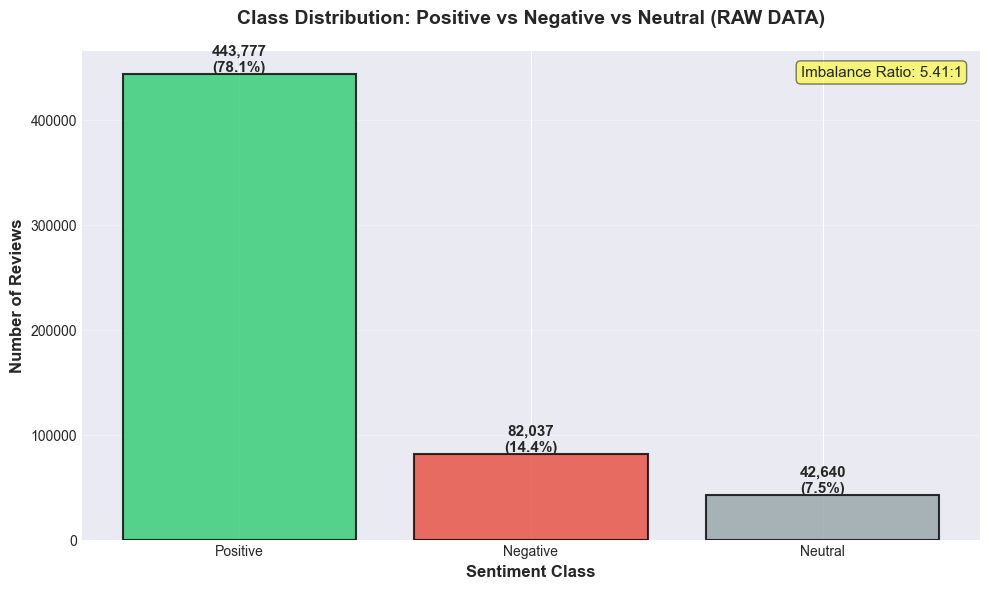


Visualization saved to: plots/raw_class_imbalance.png


In [10]:
# Visualize class imbalance
fig, ax = plt.subplots(figsize=(10, 6))

color_map = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6', 'Unknown': '#34495e'}
colors_list = [color_map.get(cat, '#34495e') for cat in sentiment_counts.index]

bars = ax.bar(sentiment_counts.index, sentiment_counts.values, 
              color=colors_list, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels
for bar, count in zip(bars, sentiment_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}\n({count/len(df_raw)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_xlabel('Sentiment Class', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Reviews', fontsize=12, fontweight='bold')
ax.set_title('Class Distribution: Positive vs Negative vs Neutral (RAW DATA)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

# Add imbalance ratio annotation
if 'Positive' in sentiment_counts and 'Negative' in sentiment_counts:
    ax.text(0.98, 0.97, f'Imbalance Ratio: {imbalance_ratio:.2f}:1',
            transform=ax.transAxes, fontsize=11, verticalalignment='top',
            horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.savefig('plots/raw_class_imbalance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved to: plots/raw_class_imbalance.png")

## 4. Text Data Analysis (RAW - Before Cleaning)

**Key Questions:** 
- What do the raw reviews look like?
- How long are they?
- Do they contain HTML, special characters, or other noise?

In [11]:
# Identify text column
text_column = 'Text' if 'Text' in df_raw.columns else \
              'review' if 'review' in df_raw.columns else \
              df_raw.columns[0]  # Fallback to first column

print(f"Using text column: '{text_column}'")

# Display sample reviews
print("\nSample Raw Reviews:")
for i, text in enumerate(df_raw[text_column].dropna().head(5), 1):
    print(f"\n--- Review {i} ---")
    print(text[:300] + "..." if len(str(text)) > 300 else text)

Using text column: 'Text'

Sample Raw Reviews:

--- Review 1 ---
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

--- Review 2 ---
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

--- Review 3 ---
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly reco...

--- Review 4 ---
If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root 

In [12]:
# Calculate text length statistics
df_raw['text_length'] = df_raw[text_column].astype(str).apply(len)
df_raw['word_count'] = df_raw[text_column].astype(str).apply(lambda x: len(x.split()))

print("\nText Length Statistics (Characters):")
print(df_raw['text_length'].describe())

print("\nWord Count Statistics:")
print(df_raw['word_count'].describe())


Text Length Statistics (Characters):
count    568454.000000
mean        436.222083
std         445.339741
min          12.000000
25%         179.000000
50%         302.000000
75%         527.000000
max       21409.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    568454.000000
mean         80.264023
std          79.455384
min           3.000000
25%          33.000000
50%          56.000000
75%          98.000000
max        3432.000000
Name: word_count, dtype: float64


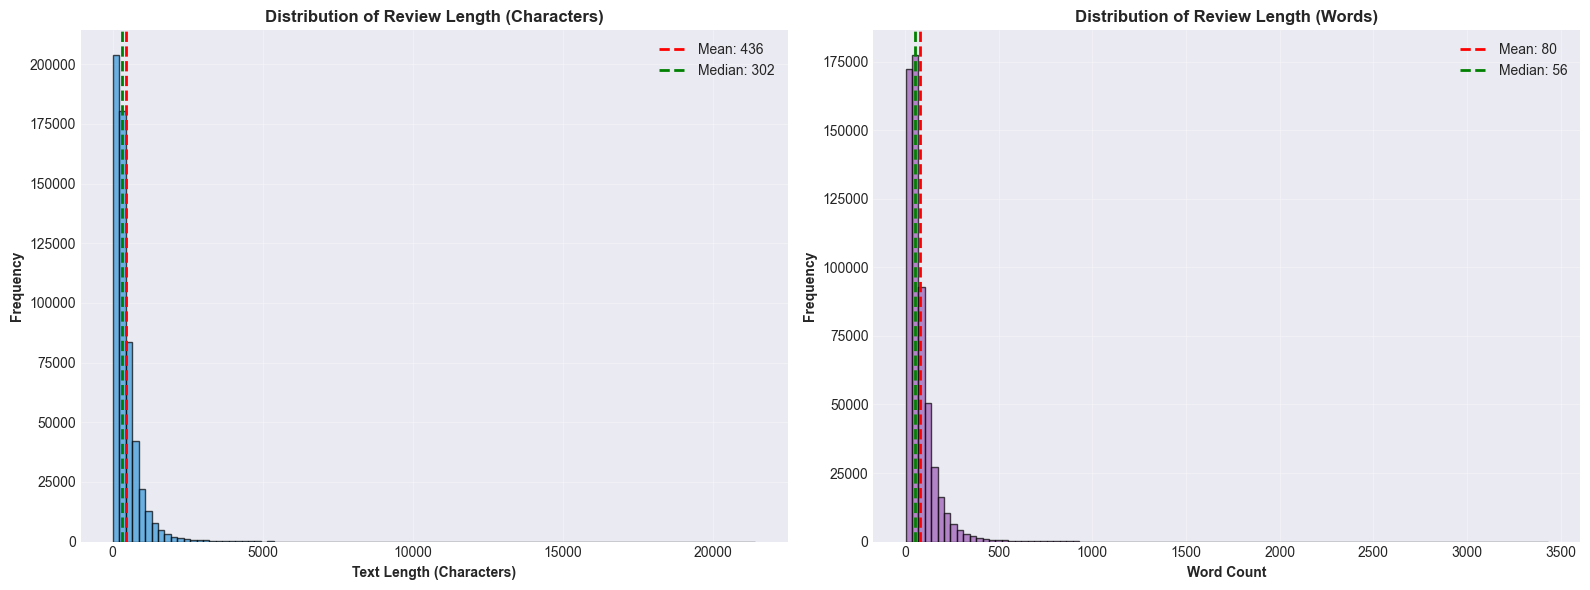


Visualization saved to: plots/raw_text_length_distribution.png


In [13]:
# Visualize text length distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Character length distribution
ax1.hist(df_raw['text_length'], bins=100, color='#3498db', alpha=0.7, edgecolor='black')
ax1.axvline(df_raw['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_raw["text_length"].mean():.0f}')
ax1.axvline(df_raw['text_length'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_raw["text_length"].median():.0f}')
ax1.set_xlabel('Text Length (Characters)', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Distribution of Review Length (Characters)', fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Word count distribution
ax2.hist(df_raw['word_count'], bins=100, color='#9b59b6', alpha=0.7, edgecolor='black')
ax2.axvline(df_raw['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_raw["word_count"].mean():.0f}')
ax2.axvline(df_raw['word_count'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_raw["word_count"].median():.0f}')
ax2.set_xlabel('Word Count', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('Distribution of Review Length (Words)', fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('plots/raw_text_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved to: plots/raw_text_length_distribution.png")

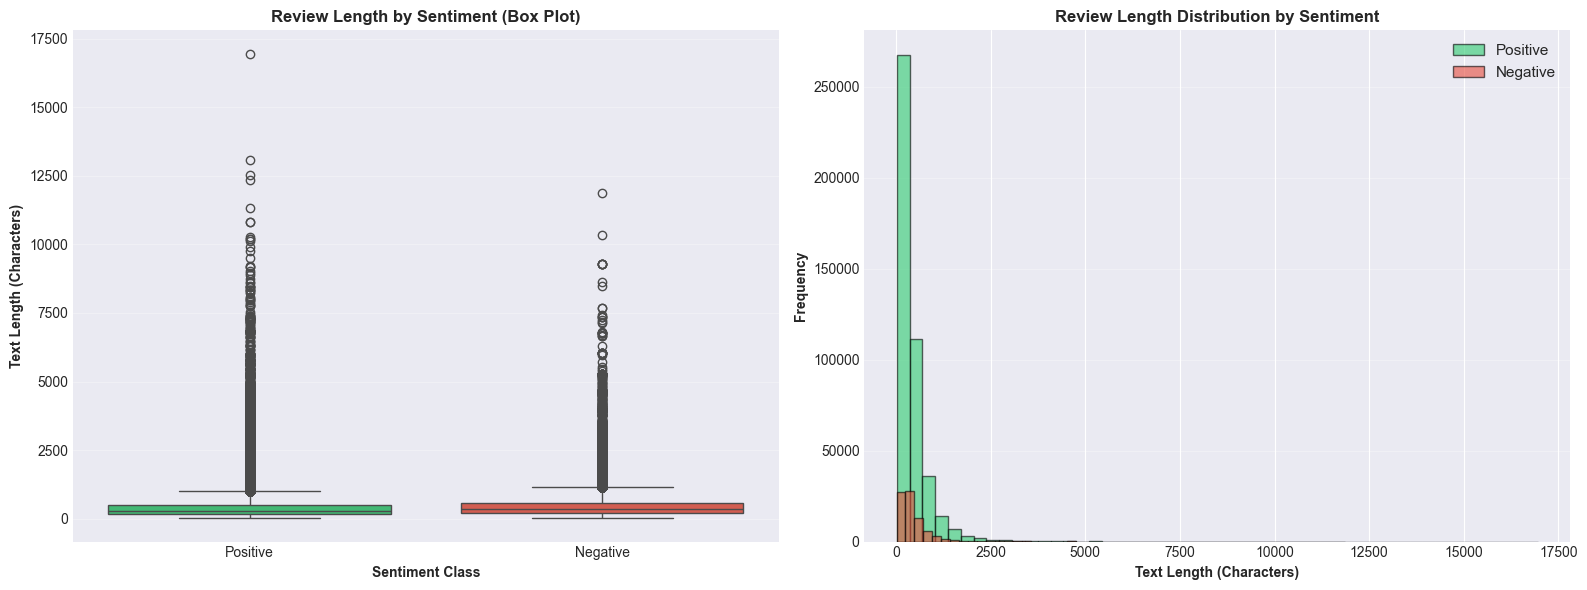


Visualization saved to: plots/raw_length_by_sentiment.png


In [14]:
# Text length by sentiment class
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
df_sentiment = df_raw[df_raw['sentiment_class'].isin(['Positive', 'Negative'])]
sns.boxplot(data=df_sentiment, x='sentiment_class', y='text_length', 
            palette={'Positive': '#2ecc71', 'Negative': '#e74c3c'}, ax=ax1)
ax1.set_xlabel('Sentiment Class', fontweight='bold')
ax1.set_ylabel('Text Length (Characters)', fontweight='bold')
ax1.set_title('Review Length by Sentiment (Box Plot)', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Overlapping histograms
positive_lengths = df_raw[df_raw['sentiment_class'] == 'Positive']['text_length']
negative_lengths = df_raw[df_raw['sentiment_class'] == 'Negative']['text_length']

ax2.hist(positive_lengths, bins=50, alpha=0.6, label='Positive', color='#2ecc71', edgecolor='black')
ax2.hist(negative_lengths, bins=50, alpha=0.6, label='Negative', color='#e74c3c', edgecolor='black')
ax2.set_xlabel('Text Length (Characters)', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('Review Length Distribution by Sentiment', fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('plots/raw_length_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved to: plots/raw_length_by_sentiment.png")

### Data Quality Check: HTML, Special Characters, Empty Reviews

In [15]:
import re

# Check for HTML tags (more strict pattern to avoid false positives)
html_pattern = re.compile(r'<[a-zA-Z][^>]*>')  # Must start with letter (actual HTML tags)
reviews_with_html = df_raw[text_column].astype(str).apply(lambda x: bool(html_pattern.search(x))).sum()

# Check for special characters
special_chars_pattern = re.compile(r'[^a-zA-Z0-9\s.,!?\'\"\-]')
reviews_with_special = df_raw[text_column].astype(str).apply(lambda x: bool(special_chars_pattern.search(x))).sum()

# Check for very short reviews (<10 characters)
very_short_reviews = (df_raw['text_length'] < 10).sum()

# Check for null/empty reviews
null_reviews = df_raw[text_column].isna().sum()
empty_reviews = (df_raw[text_column].astype(str).str.strip() == '').sum()

print("\nData Quality Analysis:")
print(f"Total reviews: {len(df_raw):,}")
print(f"\nReviews containing HTML tags: {reviews_with_html:,} ({reviews_with_html/len(df_raw)*100:.2f}%)")
print(f"Reviews containing special characters: {reviews_with_special:,} ({reviews_with_special/len(df_raw)*100:.2f}%)")
print(f"Very short reviews (<10 chars): {very_short_reviews:,} ({very_short_reviews/len(df_raw)*100:.2f}%)")
print(f"Null reviews: {null_reviews:,} ({null_reviews/len(df_raw)*100:.2f}%)")
print(f"Empty reviews: {empty_reviews:,} ({empty_reviews/len(df_raw)*100:.2f}%)")

# Show example of review with HTML (if any)
if reviews_with_html > 0:
    html_reviews = df_raw[df_raw[text_column].astype(str).apply(lambda x: bool(html_pattern.search(x)))]
    html_example = html_reviews[text_column].iloc[0]
    print(f"\nExample review with HTML tags:")
    print(html_example[:500] + "..." if len(str(html_example)) > 500 else html_example)
else:
    print("\nNo HTML tags detected in the dataset.")


Data Quality Analysis:
Total reviews: 568,454

Reviews containing HTML tags: 147,324 (25.92%)
Reviews containing special characters: 269,411 (47.39%)
Very short reviews (<10 chars): 0 (0.00%)
Null reviews: 0 (0.00%)
Empty reviews: 0 (0.00%)

Example review with HTML tags:
I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I ...


## 5. Word Frequency Analysis (RAW Text)

In [16]:
from collections import Counter

# Get all words from positive reviews (raw)
positive_reviews = df_raw[df_raw['sentiment_class'] == 'Positive'][text_column].astype(str)
positive_words = ' '.join(positive_reviews).lower().split()
positive_word_freq = Counter(positive_words).most_common(20)

# Get all words from negative reviews (raw)
negative_reviews = df_raw[df_raw['sentiment_class'] == 'Negative'][text_column].astype(str)
negative_words = ' '.join(negative_reviews).lower().split()
negative_word_freq = Counter(negative_words).most_common(20)

print("\nTop 20 Most Frequent Words in Positive Reviews (RAW):")
for word, count in positive_word_freq:
    print(f"  {word}: {count:,}")

print("\nTop 20 Most Frequent Words in Negative Reviews (RAW):")
for word, count in negative_word_freq:
    print(f"  {word}: {count:,}")


Top 20 Most Frequent Words in Positive Reviews (RAW):
  the: 1,329,981
  i: 1,053,424
  and: 989,353
  a: 922,160
  to: 753,518
  of: 588,059
  it: 574,480
  is: 561,186
  this: 474,764
  for: 421,345
  in: 405,443
  my: 358,194
  that: 298,246
  with: 268,284
  have: 264,000
  are: 249,754
  but: 248,933
  you: 241,527
  they: 210,372
  as: 205,508

Top 20 Most Frequent Words in Negative Reviews (RAW):
  the: 319,051
  i: 244,818
  and: 177,829
  a: 161,963
  to: 160,072
  of: 132,937
  it: 124,217
  this: 106,236
  is: 97,677
  in: 81,033
  was: 75,847
  not: 74,286
  that: 72,347
  for: 71,898
  but: 62,078
  my: 60,395
  have: 49,592
  with: 47,773
  they: 46,367
  like: 42,023


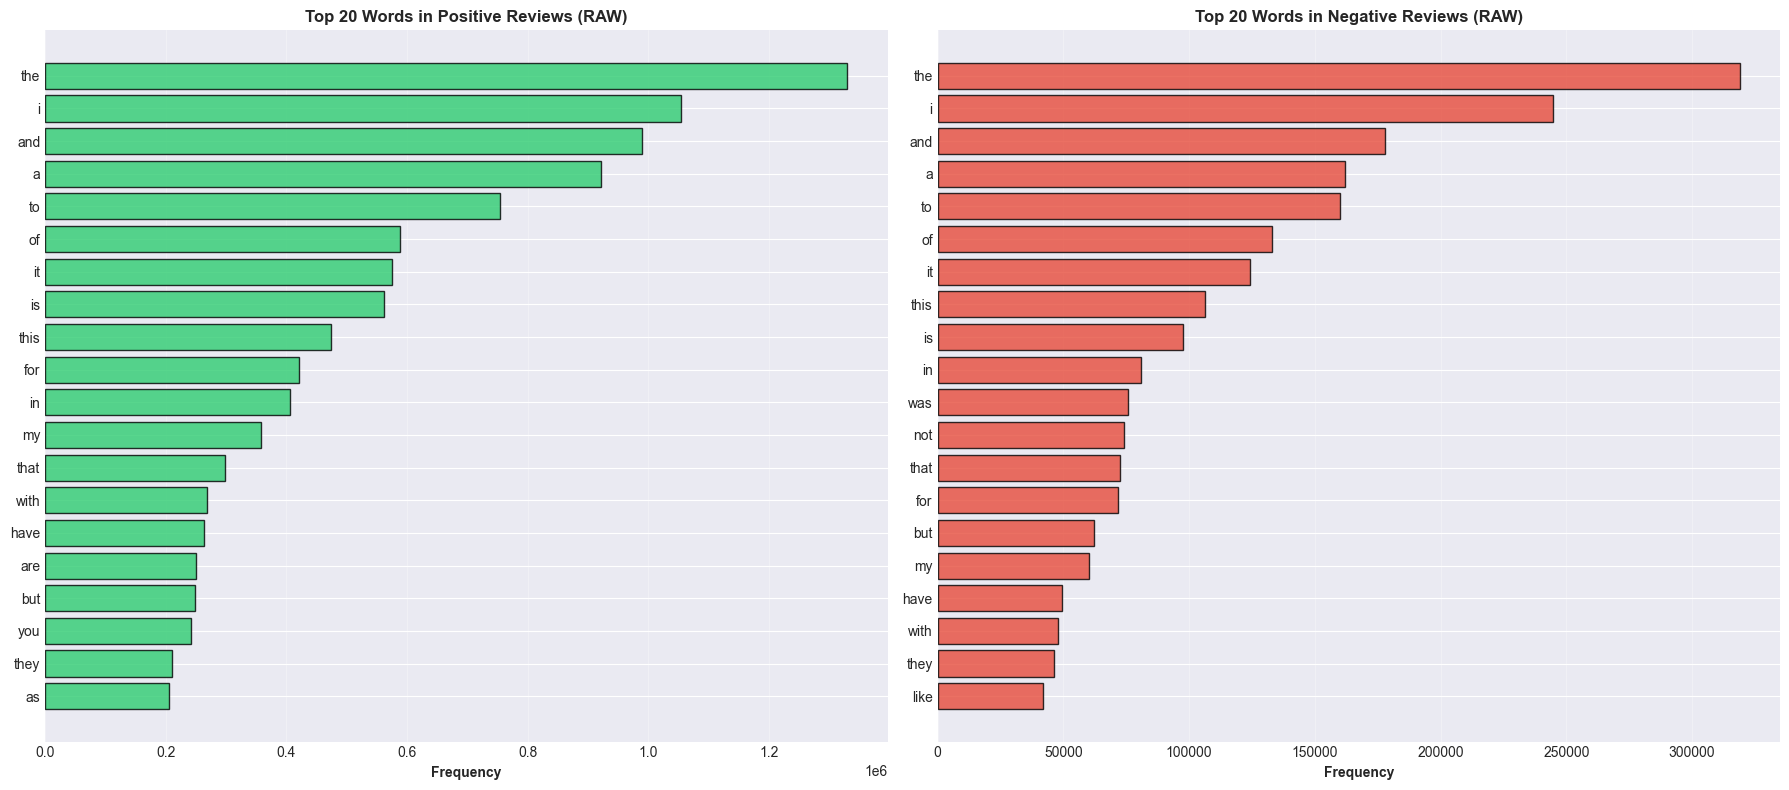


Visualization saved to: plots/raw_top_words_by_sentiment.png


In [17]:
# Visualize top words
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Positive words
words_pos = [word for word, _ in positive_word_freq]
counts_pos = [count for _, count in positive_word_freq]
y_pos = np.arange(len(words_pos))
ax1.barh(y_pos, counts_pos, color='#2ecc71', alpha=0.8, edgecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(words_pos)
ax1.invert_yaxis()
ax1.set_xlabel('Frequency', fontweight='bold')
ax1.set_title('Top 20 Words in Positive Reviews (RAW)', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Negative words
words_neg = [word for word, _ in negative_word_freq]
counts_neg = [count for _, count in negative_word_freq]
y_pos = np.arange(len(words_neg))
ax2.barh(y_pos, counts_neg, color='#e74c3c', alpha=0.8, edgecolor='black')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(words_neg)
ax2.invert_yaxis()
ax2.set_xlabel('Frequency', fontweight='bold')
ax2.set_title('Top 20 Words in Negative Reviews (RAW)', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('plots/raw_top_words_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved to: plots/raw_top_words_by_sentiment.png")

## 6. Word Clouds (RAW Text)

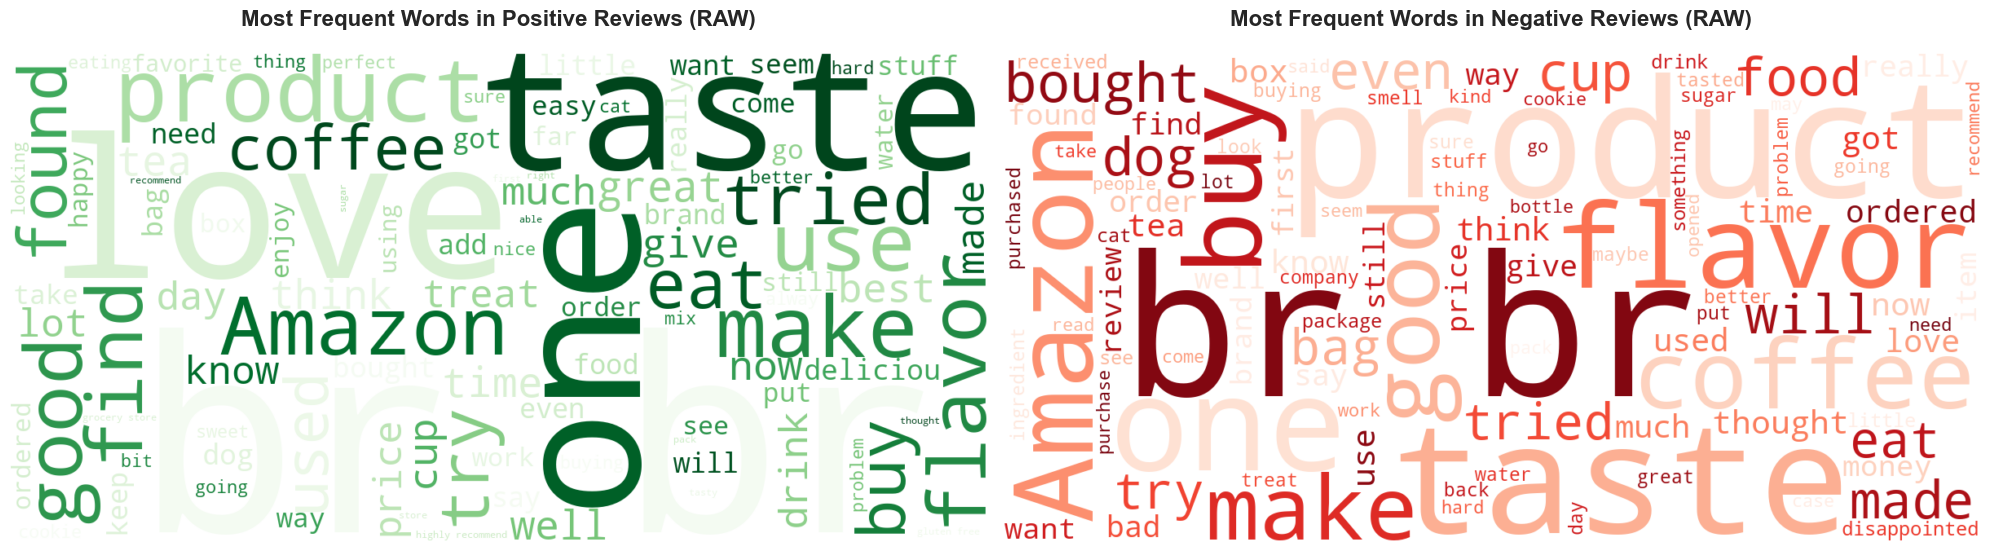


Visualization saved to: plots/raw_wordclouds.png


In [18]:
# Generate word clouds from raw text
positive_text = ' '.join(df_raw[df_raw['sentiment_class'] == 'Positive'][text_column].astype(str))
negative_text = ' '.join(df_raw[df_raw['sentiment_class'] == 'Negative'][text_column].astype(str))

# Create word clouds
wordcloud_config = {
    'width': 1200,
    'height': 600,
    'background_color': 'white',
    'max_words': 100,
    'relative_scaling': 0.5,
    'min_font_size': 10
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Positive word cloud
wc_positive = WordCloud(**wordcloud_config, colormap='Greens').generate(positive_text)
ax1.imshow(wc_positive, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Most Frequent Words in Positive Reviews (RAW)', fontsize=16, fontweight='bold', pad=20)

# Negative word cloud
wc_negative = WordCloud(**wordcloud_config, colormap='Reds').generate(negative_text)
ax2.imshow(wc_negative, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Frequent Words in Negative Reviews (RAW)', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('plots/raw_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved to: plots/raw_wordclouds.png")

## 7. Correlation Analysis


Correlation Matrix:
                Score  text_length  word_count
Score        1.000000    -0.077334   -0.077017
text_length -0.077334     1.000000    0.995469
word_count  -0.077017     0.995469    1.000000


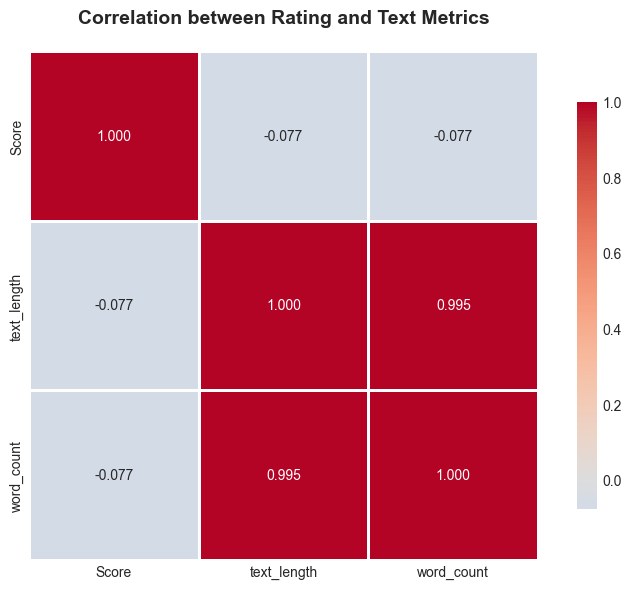


Visualization saved to: plots/raw_correlation_matrix.png


In [19]:
# Analyze correlation between text length and rating
correlation = df_raw[[rating_column, 'text_length', 'word_count']].corr()

print("\nCorrelation Matrix:")
print(correlation)

# Visualize correlation
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation between Rating and Text Metrics', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('plots/raw_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved to: plots/raw_correlation_matrix.png")

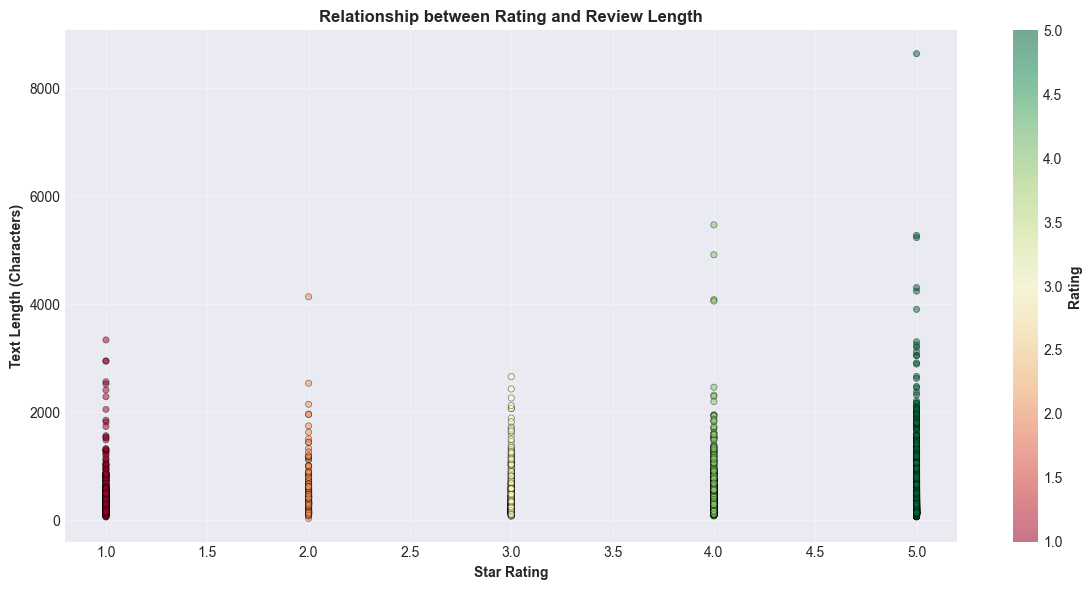


Visualization saved to: plots/raw_rating_vs_length_scatter.png


In [20]:
# Scatter plot: Rating vs Text Length
fig, ax = plt.subplots(figsize=(12, 6))

# Sample data for visualization (to avoid overcrowding)
sample_df = df_raw.sample(n=min(5000, len(df_raw)), random_state=42)

scatter = ax.scatter(sample_df[rating_column], sample_df['text_length'], 
                     c=sample_df[rating_column], cmap='RdYlGn', 
                     alpha=0.5, s=20, edgecolors='black', linewidth=0.5)

ax.set_xlabel('Star Rating', fontweight='bold')
ax.set_ylabel('Text Length (Characters)', fontweight='bold')
ax.set_title('Relationship between Rating and Review Length', fontweight='bold')
ax.grid(alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Rating', fontweight='bold')

plt.tight_layout()
plt.savefig('plots/raw_rating_vs_length_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved to: plots/raw_rating_vs_length_scatter.png")

## 8. Summary Statistics Dashboard

In [21]:
# Create comprehensive summary
summary = f"""
================================================================================
                    RAW DATA SUMMARY - EXPLORATORY DATA ANALYSIS
================================================================================

DATASET OVERVIEW:
  - Total Records: {len(df_raw):,}
  - Total Columns: {len(df_raw.columns)}
  - Text Column: '{text_column}'
  - Rating Column: '{rating_column}'

RATING DISTRIBUTION:
"""

for rating, count in rating_counts.items():
    summary += f"  - {int(rating)} Stars: {count:,} ({count/len(df_raw)*100:.2f}%)\n"

summary += f"""
SENTIMENT CLASS DISTRIBUTION:
  - Positive: {sentiment_counts.get('Positive', 0):,} ({sentiment_counts.get('Positive', 0)/len(df_raw)*100:.2f}%)
  - Negative: {sentiment_counts.get('Negative', 0):,} ({sentiment_counts.get('Negative', 0)/len(df_raw)*100:.2f}%)
  - Neutral: {sentiment_counts.get('Neutral', 0):,} ({sentiment_counts.get('Neutral', 0)/len(df_raw)*100:.2f}%)
  - Imbalance Ratio: {imbalance_ratio:.2f}:1

TEXT LENGTH STATISTICS:
  - Mean Length: {df_raw['text_length'].mean():.0f} characters
  - Median Length: {df_raw['text_length'].median():.0f} characters
  - Min Length: {df_raw['text_length'].min():.0f} characters
  - Max Length: {df_raw['text_length'].max():.0f} characters
  - Mean Word Count: {df_raw['word_count'].mean():.0f} words

DATA QUALITY ISSUES:
  - Reviews with HTML: {reviews_with_html:,} ({reviews_with_html/len(df_raw)*100:.2f}%)
  - Reviews with special chars: {reviews_with_special:,} ({reviews_with_special/len(df_raw)*100:.2f}%)
  - Very short reviews (<10 chars): {very_short_reviews:,} ({very_short_reviews/len(df_raw)*100:.2f}%)
  - Null reviews: {null_reviews:,} ({null_reviews/len(df_raw)*100:.2f}%)
  - Empty reviews: {empty_reviews:,} ({empty_reviews/len(df_raw)*100:.2f}%)

KEY INSIGHTS:
  1. Class Imbalance: The dataset shows significant class imbalance ({imbalance_ratio:.2f}:1)
     → This will require balancing techniques during model training
  
  2. Data Quality: {'HTML and special characters present' if reviews_with_html > 0 else 'Minimal data quality issues'}
     → Text preprocessing pipeline needed to clean data
  
  3. Neutral Reviews: {sentiment_counts.get('Neutral', 0):,} neutral (3-star) reviews will be excluded
     → Focusing on clear positive/negative sentiment improves model clarity
  
  4. Text Length Correlation: Rating and text length correlation = {correlation.loc[rating_column, 'text_length']:.3f}
     → {'Negative reviews tend to be longer' if correlation.loc[rating_column, 'text_length'] < 0 else 'Positive reviews tend to be longer' if correlation.loc[rating_column, 'text_length'] > 0 else 'No strong correlation'}

================================================================================
"""

print(summary)

# Save summary to file
with open('plots/raw_data_summary.txt', 'w') as f:
    f.write(summary)

print("\nSummary saved to: plots/raw_data_summary.txt")


                    RAW DATA SUMMARY - EXPLORATORY DATA ANALYSIS

DATASET OVERVIEW:
  - Total Records: 568,454
  - Total Columns: 13
  - Text Column: 'Text'
  - Rating Column: 'Score'

RATING DISTRIBUTION:
  - 1 Stars: 52,268 (9.19%)
  - 2 Stars: 29,769 (5.24%)
  - 3 Stars: 42,640 (7.50%)
  - 4 Stars: 80,655 (14.19%)
  - 5 Stars: 363,122 (63.88%)

SENTIMENT CLASS DISTRIBUTION:
  - Positive: 443,777 (78.07%)
  - Negative: 82,037 (14.43%)
  - Neutral: 42,640 (7.50%)
  - Imbalance Ratio: 5.41:1

TEXT LENGTH STATISTICS:
  - Mean Length: 436 characters
  - Median Length: 302 characters
  - Min Length: 12 characters
  - Max Length: 21409 characters
  - Mean Word Count: 80 words

DATA QUALITY ISSUES:
  - Reviews with HTML: 147,324 (25.92%)
  - Reviews with special chars: 269,411 (47.39%)
  - Very short reviews (<10 chars): 0 (0.00%)
  - Null reviews: 0 (0.00%)
  - Empty reviews: 0 (0.00%)

KEY INSIGHTS:
  1. Class Imbalance: The dataset shows significant class imbalance (5.41:1)
     → This 

## 9. Conclusions and Next Steps

### Key Findings from Raw Data Analysis:

1. **Significant Class Imbalance**: The dataset contains substantially more positive reviews than negative reviews
   - **Solution**: Implement class balancing using undersampling/oversampling to create 50/50 distribution
   - **Rationale**: Prevents model bias toward majority class

2. **Data Quality Issues**: Raw text contains HTML tags, special characters, and noise
   - **Solution**: Comprehensive text preprocessing pipeline (HTML removal, lowercasing, punctuation handling, stop word removal)
   - **Rationale**: Clean data improves model performance and reduces noise

3. **Neutral Reviews**: 3-star reviews provide ambiguous sentiment
   - **Solution**: Exclude neutral reviews to focus on clear positive/negative sentiment
   - **Rationale**: Improves classification clarity and reduces label noise

4. **Variable Review Lengths**: Reviews range from very short to very long
   - **Solution**: TF-IDF vectorization handles variable-length text effectively
   - **Rationale**: TF-IDF normalizes for document length and weights important terms

### Next Steps:
1. Apply text preprocessing pipeline (see `src/text_preprocessor.py`)
2. Balance classes (see `src/data_loader.py` - `_balance_classes()` method)
3. Feature engineering with TF-IDF vectorization
4. Train and compare multiple ML algorithms (Naive Bayes, Logistic Regression, Random Forest)
5. Evaluate model performance with cross-validation
6. Deploy best-performing model

---

**Note**: This EDA was performed on the raw, unprocessed data to understand its characteristics before any modeling. All visualizations have been saved to the `plots/` directory.